In [3]:
# basic libraries
import pandas as pd
import numpy as np

# plottting lib
import seaborn as sns
import matplotlib.pyplot as plt


### pre-processing lib
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn. model_selection import train_test_split,GridSearchCV,KFold,cross_val_predict,RandomizedSearchCV


### classification lib required
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier,VotingClassifier,StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import KernelPCA,PCA
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC

## different metrices
from sklearn.metrics import accuracy_score, r2_score

#Note all libraies may not be in use 

# Importing Data

In [4]:
data = pd.read_csv('/content/winequality_red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

see variance, S.D. and mean so that we can think about normalization or not

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


co-relation plot for seeing how much data corelated to predicting label

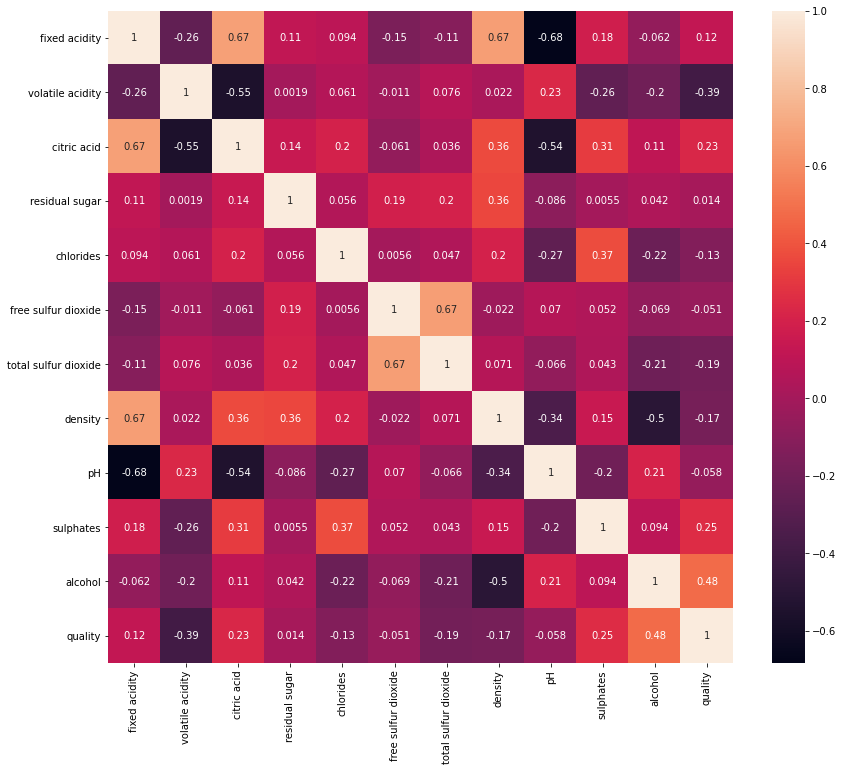

In [8]:
corelation = data.corr()
plt.figure(figsize = (14,12))
sns.heatmap(corelation, annot=True)

Simple feature Selection we are going to perform

In [9]:
corelation['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [10]:
corelation.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
selected_features = ['volatile acidity', 'citric acid', 'sulphates', 'alcohol','quality']

Text(0.5, 1.0, 'Scatter Matrix plot of selected features.')

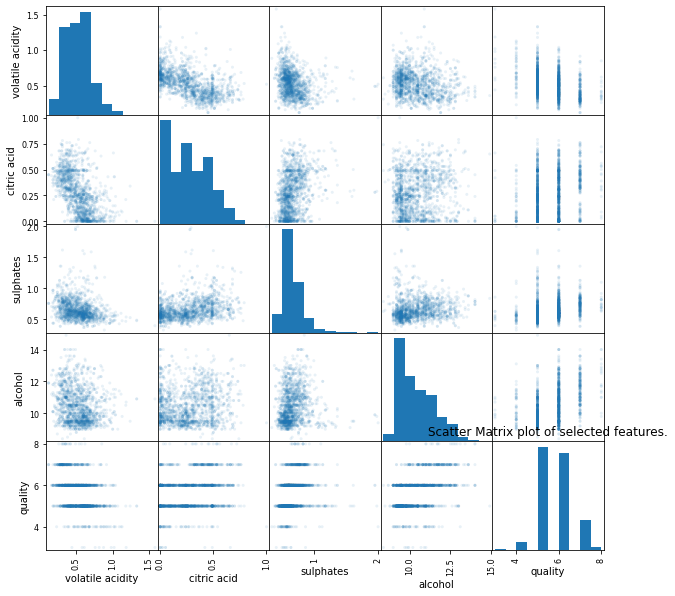

In [12]:
feat_data = data[selected_features]
pd.plotting.scatter_matrix(feat_data, alpha = 0.1, figsize = (10, 10))
plt.title('Scatter Matrix plot of selected features.')

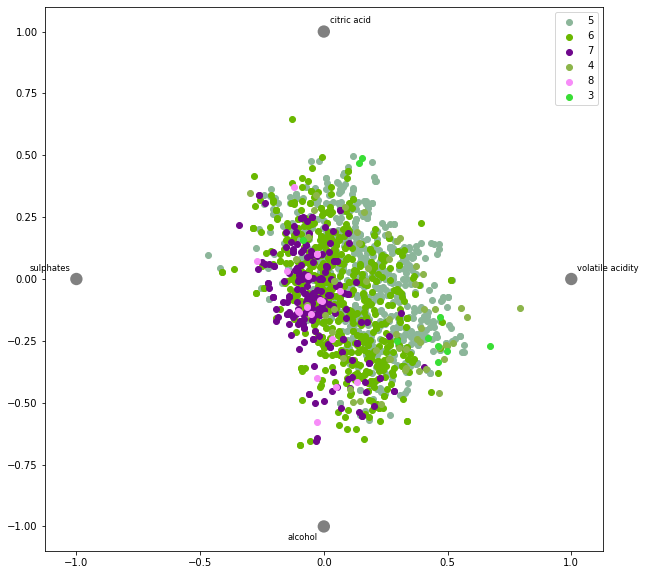

In [13]:
plt.figure(figsize = (10, 10))
pd.plotting.radviz(feat_data, 'quality')

In [14]:
labels = feat_data.pop('quality')
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)

support vector machine classifier

In [15]:
svm = SVC(gamma = 'scale', probability = True)
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)
print("*"* 30)
score = accuracy_score(y_test, svm_pred)
print("SVM accuracy is :{}".format(score))

******************************
SVM accuracy is :0.5375


Random Forest Classifier

In [16]:
random_f = RandomForestClassifier(n_estimators = 250)
random_f.fit(X_train, y_train)
random_f_pred = random_f.predict(X_test)
print("*"* 30)
score = accuracy_score(y_test, random_f_pred)
print("random forest accuracy is :{}".format(score))

******************************
random forest accuracy is :0.98125


Logistic Regression

In [17]:
log = LogisticRegression(solver = 'liblinear')
log.fit(X_train, y_train)
pred=log.predict(X_test)
print("*"* 30)
score=accuracy_score(y_test, pred)
print("LogisticRegression accuracy is :{}".format(score))

******************************
LogisticRegression accuracy is :0.896875


Decision Tree Classifier

In [18]:
Decision = DecisionTreeClassifier()
Decision.fit(X_train, y_train)
pred = Decision.predict(X_test)
print("*"* 30)
score = accuracy_score(y_test, pred)
print("DecisionTreeClassifier accuracy is :{}".format(score))

******************************
DecisionTreeClassifier accuracy is :1.0


Gaussian Classifier

In [19]:
guassian = GaussianNB()
guassian.fit(X_train, y_train)
pred = guassian.predict(X_test)
print("*"* 30)
score = accuracy_score(y_test, pred)
print("GaussianNB accuracy is :{}".format(score))

******************************
GaussianNB accuracy is :1.0


k-nearest neighbors Classifier

In [20]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
pred = KNN.predict(X_test)
print("*"* 30)
score = accuracy_score(y_test, pred)
print("KNeighborsClassifier accuracy is :{}".format(score))

******************************
KNeighborsClassifier accuracy is :0.58125


AdaBoost Classifier

In [21]:
Ada = AdaBoostClassifier()
Ada.fit(X_train, y_train)
pred = Ada.predict(X_test)
print("*"* 30)
score = accuracy_score(y_test, pred)
print("AdaBoostClassifier accuracy is :{}".format(score))

******************************
AdaBoostClassifier accuracy is :0.8375


BaggingClassifier

In [22]:
Bagging = BaggingClassifier(n_estimators = 300)
Bagging.fit(X_train, y_train)
pred = Bagging.predict(X_test)
print("*"* 30)
score=accuracy_score(y_test, pred)
print("BaggingClassifier accuracy is :{}".format(score))

******************************
BaggingClassifier accuracy is :1.0


ExtraTrees Classifier

In [23]:
Ex_Tree = ExtraTreesClassifier(n_estimators=300)
Ex_Tree.fit(X_train, y_train)
pred = Ex_Tree.predict(X_test)
print("*"* 30)
score = accuracy_score(y_test, pred)
print("ExtraTreesClassifier accuracy is :{}".format(score))

******************************
ExtraTreesClassifier accuracy is :1.0


Extreme gradient boosting classifier

In [24]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
pred = XGB.predict(X_test)
print("*"* 30)
score=accuracy_score(y_test, pred)
print("XGBClassifier accuracy is :{}".format(score))

******************************
XGBClassifier accuracy is :1.0


# Super-learner model

In [25]:
def get_models():
	models = list()
	models.append(LogisticRegression(solver = 'liblinear'))
	models.append(DecisionTreeClassifier())
	models.append(SVC(gamma = 'scale', probability = True))
	models.append(GaussianNB())
	models.append(KNeighborsClassifier())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier(n_estimators=10))
	models.append(RandomForestClassifier(n_estimators=10))
	models.append(ExtraTreesClassifier(n_estimators=10))
	models.append(XGBClassifier())
	return models

In [26]:
!pip install mlens

     |████████████████████████████████| 235kB 17.0MB/s 


In [27]:
import mlens
from mlens.ensemble import SuperLearner
def get_super_learner(X):
	ensemble = SuperLearner(scorer=accuracy_score, folds=10, shuffle=True, sample_size=len(X))
	# add base models
	models = get_models()
	ensemble.add(models)
	# add the meta model
	ensemble.add_meta(LogisticRegression(solver='lbfgs'))
	return ensemble

[MLENS] backend: threading


In [28]:
ensemble = get_super_learner(X_train)

In [29]:
# fit the super learner
ensemble.fit(X_train.values,y_train.values)
# summarize base learners
print(ensemble.data)

yhat = ensemble.predict(X_test.values)

print("*"* 30)
score=accuracy_score(y_test, yhat)
print("Super Learner accuracy is :{}".format(score))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/mlens/parallel/_base_functions.py:313: ParameterChangeWarning: Parameter value ('multi:softprob') has changed since model was fitted ('binary:logistic').
  (lpar, rpar), ParameterChangeWarning)


                                   score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  adaboostclassifier           0.84     0.02  0.23  0.01  0.02  0.00
layer-1  baggingclassifier            1.00     0.00  0.04  0.00  0.00  0.00
layer-1  decisiontreeclassifier       1.00     0.00  0.00  0.00  0.00  0.00
layer-1  extratreesclassifier         0.99     0.02  0.03  0.00  0.00  0.00
layer-1  gaussiannb                   1.00     0.00  0.00  0.00  0.00  0.00
layer-1  kneighborsclassifier         0.59     0.06  0.00  0.00  0.02  0.00
layer-1  logisticregression           0.89     0.02  0.04  0.00  0.00  0.00
layer-1  randomforestclassifier       0.98     0.01  0.04  0.00  0.00  0.00
layer-1  svc                          0.53     0.03  0.54  0.01  0.01  0.00
layer-1  xgbclassifier                1.00     0.00  0.34  0.01  0.00  0.00

******************************
Super Learner accuracy is :1.0


/usr/local/lib/python3.7/dist-packages/mlens/parallel/_base_functions.py:313: ParameterChangeWarning: Parameter value ('multi:softprob') has changed since model was fitted ('binary:logistic').
  (lpar, rpar), ParameterChangeWarning)


In [30]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00       130
           6       1.00      1.00      1.00       132
           7       1.00      1.00      1.00        42
           8       1.00      1.00      1.00         5

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

